In [1]:
import os
os.chdir("/data/t-achetan/adv_geom/src/")
import numpy as np
import torch

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from datagen.synthetic.multiple.wellseparatedspheres import WellSeparatedSpheres

In [3]:
config = {
    "N": 20000,
    "num_neg": 10000,
    "n": 2,
    "k": 2,
    "r": [0.5, 0.5],
    "D": 0.07,
    "max_norm": 0.,
    "mu": 0,
    "sigma": 1,
    "seed": 23,
    "normalize": True,
    "norm_factor": 1,
    "bp": 0.09,
    "M": 1,
    "inferred": True,
    "online": False,
    "off_online": False,
    "augment": False,
    "max_t_delta": 1e-3,
    "recomp_tn": False,
    "gamma": 0,
    "cache_dir": "/mnt/t-achetan/data_cache/train/",
    "c_dist": 2.5
}

In [4]:
test_spheres = WellSeparatedSpheres(**config)

In [5]:
test_spheres.compute_points()

17-05-2022 17:21:05 -- [I] root >> [RandomSphere]: generated centre
17-05-2022 17:21:05 -- [I] root >> [RandomSphere]: generated points in k-dim
17-05-2022 17:21:05 -- [I] root >> [WellSeparatedSpheres]: Generated S1
17-05-2022 17:21:05 -- [I] root >> [RandomSphere]: generated centre
17-05-2022 17:21:05 -- [I] root >> [RandomSphere]: generated points in k-dim
17-05-2022 17:21:05 -- [I] root >> [WellSeparatedSpheres]: Generated S2
17-05-2022 17:21:05 -- [I] root >> [WellSeparatedSpheres]: made poca_idx
17-05-2022 17:21:05 -- [I] root >> [WellSeparatedSpheres]: collect on-mfld k-dim points from both spheres
17-05-2022 17:21:05 -- [I] root >> initial setup complete
17-05-2022 17:21:05 -- [I] root >> [WellSeparatedSpheres]: knn not computed. computing now ...
17-05-2022 17:21:05 -- [I] root >> [WellSeparatedSpheres]: use_new == False
17-05-2022 17:21:05 -- [I] root >> [WellSeparatedSpheres]: fitting knn...


before compute x_cn: [[ 0.66698806  0.02581308]
 [-0.77761941  0.94863382]]


17-05-2022 17:21:08 -- [I] root >> [WellSeparatedSpheres]: knn fit done
17-05-2022 17:21:08 -- [I] root >> [WellSeparatedSpheres]: predicting nbhrs...
17-05-2022 17:21:08 -- [I] root >> [WellSeparatedSpheres]: prediction complete...
computing off mfld (2): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]
17-05-2022 17:21:11 -- [I] root >> [WellSeparatedSpheres]: using c_dist = 2.5
17-05-2022 17:21:11 -- [I] root >> [WellSeparatedSpheres]: re-positioning n-dim points of S2
17-05-2022 17:21:11 -- [I] root >> [WellSeparatedSpheres]: S2 re-positioned
17-05-2022 17:21:12 -- [I] root >> [WellSeparatedSpheres]: Overall noramalization done


before reposition x_cn: [[-0.83633689  0.53534845]
 [ 0.183944    1.09157703]]
x_cn: tensor([[-0.8363,  0.5353],
        [-1.3885,  2.9736]])
in norm: tensor([[-0.8363,  0.5353],
        [-1.3885,  2.9736]])


In [6]:
max(test_spheres.normed_all_actual_distances[:2500, 0])

tensor(0.1400)

In [ ]:
1.1 * 2.28

([array([ 8594.,  1406.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 10000.]),
  array([ 8559.,  1441.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 10000.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

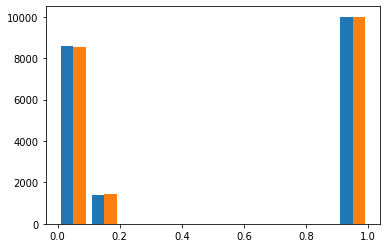

In [6]:
plt.hist(test_spheres.normed_all_actual_distances.numpy())

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(test_swrolls.all_points_trivial_[:, 0], test_swrolls.all_points_trivial_[:, 1], s=0.1)
plt.scatter(test_swrolls.all_points_trivial_[-1, 0], test_swrolls.all_points_trivial_[-1, 1])
plt.arrow(test_swrolls.all_points_trivial_[-1, 0], test_swrolls.all_points_trivial_[-1, 1], test_swrolls.all_tang_and_norms[-1][0, 0], test_swrolls.all_tang_and_norms[-1][0, 1])
plt.arrow(test_swrolls.all_points_trivial_[-1, 0], test_swrolls.all_points_trivial_[-1, 1], test_swrolls.all_tang_and_norms[-1][1, 0], test_swrolls.all_tang_and_norms[-1][1, 1])

# plt.arrow(test_swrolls.all_points_trivial_[-1, 0], test_swrolls.all_points_trivial_[-1, 1], test_swrolls.on_mfld_pb[-1][0, 0], test_swrolls.on_mfld_pb[-1][0, 1], linewidth=5)
# plt.arrow(test_swrolls.all_points_trivial_[-1, 0], test_swrolls.all_points_trivial_[-1, 1], test_swrolls.off_mfld_pb[-1][1, 0], test_swrolls.off_mfld_pb[-1][1, 1], linewidth=5)


plt.scatter(test_swrolls.off_mfld_pts_for_chunk[-1][:, 0], test_swrolls.off_mfld_pts_for_chunk[-1][:, 1])

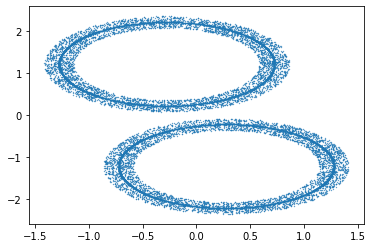

In [6]:
plt.scatter(test_spheres.normed_all_points[:, 0], test_spheres.normed_all_points[:, 1], s=0.1)

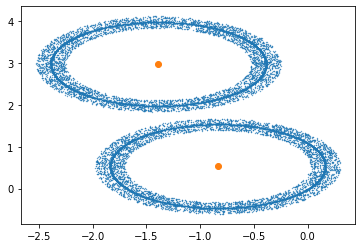

In [8]:
plt.scatter(test_spheres.all_points[:, 0], test_spheres.all_points[:, 1], s=0.1)
plt.scatter(test_spheres.x_cn[:, 0], test_spheres.x_cn[:, 1])

In [9]:
np.linalg.norm(test_spheres.x_ck[0] - test_spheres.x_ck[1])

1.71420210648482

In [10]:
np.linalg.norm(test_spheres.x_cn[0] - test_spheres.x_cn[1])

2.5000002

In [8]:
test_spheres.all_points.shape

torch.Size([20000, 2, 2])

In [ ]:
np.linalg.norm(test_spheres.all_points_rot_[:100] - test_spheres.x_cn, axis=1) - 1.

In [ ]:
test_spheres.class_labels

In [ ]:
np.linalg.norm(test_spheres.normed_all_points[10000:15000] - test_spheres.fix_center, ord=2, axis=1) - 1.3




In [ ]:
test_spheres.normed_all_actual_distances[10000:15000]

In [ ]:
np.where(test_spheres.normed_all_actual_distances[test_spheres.class_labels == 2][:, 0] > 0.1)[0].shape

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(test_spheres.on_mfld_pts_trivial_[:, 0], test_spheres.on_mfld_pts_trivial_[:, 1], s=0.01)
idx = 2000
plt.scatter(test_spheres.poca[idx][0], test_spheres.poca[idx][1])
tan_dir_local = test_spheres.tang_dset[test_spheres.poca_idx[idx]][0]
norm_dir_local = test_spheres.norm_dset[test_spheres.poca_idx[idx]][0]

plt.arrow(test_spheres.poca[idx][0], test_spheres.poca[idx][1], tan_dir_local[0], tan_dir_local[1])
plt.arrow(test_spheres.poca[idx][0], test_spheres.poca[idx][1], norm_dir_local[0], norm_dir_local[1])

on_mfld_pt = test_spheres.poca[idx]
norm_dir = test_spheres.norm_dset[test_spheres.poca_idx[idx]]
rdm_coeffs = np.random.normal(0, 1, size=norm_dir.shape[0]).reshape(-1, 1)
norm_delta = np.sum(rdm_coeffs * norm_dir, axis=0)
off_mfld_pt = on_mfld_pt + norm_delta

plt.scatter(test_spheres.new_poca_dset[idx][0], test_spheres.new_poca_dset[idx][1])
# off_mfld_idx = idx if idx < test_spheres.S1.genattrs.num_neg else idx + (test_spheres.S1.genattrs.N - test_spheres.S1.genattrs.num_neg)
# plt.scatter(test_spheres.all_points[idx][0], test_spheres.all_points[idx][1])
plt.scatter(off_mfld_pt[0], off_mfld_pt[1])

In [ ]:
test_spheres.all_tang_and_norms[-1]

In [ ]:
test_spheres.all_points_trivial_[-1] / np.linalg.norm(test_spheres.all_points_trivial_[-1], ord=2)

In [ ]:
test_spheres.x_cn

In [ ]:
np.random.choice([1, 2, 3, 4, 5, 6], size=4)

In [ ]:
np.where(test_spheres == 2)[0].shape

# Testing inferred manifold generation code on 06/05/2022

In [ ]:
dir_name = "/mnt/t-achetan/expC_dist_learner_for_adv_ex/rdm_swrolls_test/rdm_swrolls_k2n500_noninfdist_moreoffmfld__bs4096_inferred_maxtdelta=1e=3/data"
train_set, val_set, test_set = IntertwinedSwissRolls.load_splits(dir_name)



In [ ]:
test_set.on_mfld_pts_k_

In [ ]:
train_set.on_mfld_pts_trivial_[0]

In [ ]:
import scipy.linalg as spla
nbhr_indices = np.argsort(np.linalg.norm(train_set.on_mfld_pts_trivial_[0] - train_set.on_mfld_pts_trivial_[1:], axis=1))[:2]
nbhrs = train_set.on_mfld_pts_trivial_[nbhr_indices]
nbhr_local_coords = nbhrs - train_set.on_mfld_pts_trivial_[0]
pca = PCA(n_components=1)
pca.fit(nbhr_local_coords)
tang_dir = pca.components_
normal_dirs = spla.null_space(pca.components_).T

In [ ]:
normal_dirs

In [ ]:
tang_dir

In [ ]:
plt.figure(figsize=(6, 6))

onmfld_idx = -200
plt.scatter(train_set.on_mfld_pts_k_[:, 0], train_set.on_mfld_pts_k_[:, 1], s=0.01)
plt.scatter(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], s=100)
# plt.arrow(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], train_set.all_tang_and_norms[onmfld_idx][0][0], train_set.all_tang_and_norms[onmfld_idx][0][1])
# plt.arrow(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], train_set.all_tang_and_norms[onmfld_idx][1][0], train_set.all_tang_and_norms[onmfld_idx][1][1])
# plt.scatter(train_set.new_poca_dset[idx][0], train_set.new_poca_dset[idx][1])
# plt.arrow(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], train_set.on_mfld_pb[onmfld_idx][1][0], train_set.on_mfld_pb[onmfld_idx][1][1], linewidth=5)
# plt.arrow(train_set.on_mfld_pts_k_[:, 0][onmfld_idx], train_set.on_mfld_pts_k_[:, 1][onmfld_idx], train_set.off_mfld_pb[onmfld_idx][1][0], train_set.off_mfld_pb[onmfld_idx][1][1], linewidth=5)

plt.scatter(train_set.all_points_trivial_[:, 0][onmfld_idx], train_set.all_points_trivial_[:, 1][onmfld_idx])
# plt.scatter(train_set.off_mfld_pts_for_chunk[onmfld_idx][:, 0], train_set.off_mfld_pts_for_chunk[onmfld_idx][:, 1])

In [ ]:
train_set.all_tang_and_norms[-1]

In [ ]:
np.dot(train_set.on_mfld_pts_trivial_[-1] / np.linalg.norm(train_set.on_mfld_pts_trivial_[-1]), train_set.all_tang_and_norms[-1][-1])

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(train_set.normed_all_points[:, 0], train_set.normed_all_points[:, 1], s=0.01)


In [ ]:
plt.scatter(train_set.all_points_trivial_[:, 0][train_set.class_labels == 2], train_set.all_points_trivial_[:, 1][train_set.class_labels == 2], s=0.01)
plt.scatter(train_set.on_mfld_pts_k_[train_set.poca_idx, 0], train_set.on_mfld_pts_k_[train_set.poca_idx, 1], s=0.01)


In [ ]:
train_set.max_norm, train_set.norm_factor

In [ ]:
train_set.all_points.shape

In [ ]:
train_set.off_mfld_pts_for_chunk.shape

In [ ]:
train_set.off_mfld_pts_for_chunk[:, 0].shape

In [ ]:
train_set.on_mfld_pb.shape

In [ ]:
train_set.on_mfld_pts_k_[:1] + train_set.off_mfld_pb[:1].numpy()

In [ ]:
train_set.off_mfld_pb[:1].numpy()

In [ ]:
train_set.on_mfld_pts_k_[:1]

In [ ]:
a = np.zeros((2, 500))
a[0, :] = 1
a[1, :] = 2
b = np.zeros((2, 7, 500))
(np.expand_dims(a, 1) + b).reshape(-1, 500)

In [ ]:
(np.expand_dims(train_set.on_mfld_pts_k_[5000:], 1) + (np.expand_dims(train_set.on_mfld_pb_sizes / np.linalg.norm(train_set.on_mfld_pb, axis=-1), axis=-1) * train_set.on_mfld_pb.numpy())) + train_set.off_mfld_pb.numpy()




In [ ]:
torch.min(torch.norm(train_set.all_points[25000] - train_set.all_points[75000:], dim=1))

In [ ]:
np.unique(train_set.class_labels, return_counts=True)

In [ ]:
a = np.random.normal(size=(2,1000, 1000))
np.linalg.qr(a)[0]

In [ ]:
np.dot(np.linalg.qr(a)[0], a.T).T.shape